# Basic Plots

We'll be using the Kaggle Heart Disease UCI dataset as an example. You can find it here: https://www.kaggle.com/ronitf/heart-disease-uci

This section isn't meant to be ground-breaking, but will introduce you to the common syntax used in pandas, matplotlib and seaborn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

plt.style.use('ggplot')
# plt.style.use('seaborn')
# plt.style.use('bmh')
# plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')

df = pd.read_csv("heart.csv")

## Bar Plots

Comparing discrete data. Available through either pandas or matplotlib.

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# 4 distinct categories of cp
df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [4]:
# We can group the data by the categories, and take a quantile of the data by group
df.groupby(by="cp").quantile(0.5)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
cp,,,,,,,,,,,,,
0,57.0,1.0,130.0,248.0,0.0,0.0,143.0,1.0,1.2,1.0,1.0,3.0,0.0
1,52.0,1.0,128.0,238.0,0.0,1.0,163.5,0.0,0.0,2.0,0.0,2.0,1.0
2,53.0,1.0,130.0,233.0,0.0,1.0,158.0,0.0,0.5,2.0,0.0,2.0,1.0
3,59.0,1.0,140.0,234.0,0.0,0.0,159.0,0.0,1.2,1.0,0.0,2.0,1.0


In [5]:
chest_pain = df.groupby(by="cp").median().reset_index()
chest_pain.head()

,cp,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,57.0,1.0,130.0,248.0,0.0,0.0,143.0,1.0,1.2,1.0,1.0,3.0,0.0
1,1,52.0,1.0,128.0,238.0,0.0,1.0,163.5,0.0,0.0,2.0,0.0,2.0,1.0
2,2,53.0,1.0,130.0,233.0,0.0,1.0,158.0,0.0,0.5,2.0,0.0,2.0,1.0
3,3,59.0,1.0,140.0,234.0,0.0,0.0,159.0,0.0,1.2,1.0,0.0,2.0,1.0


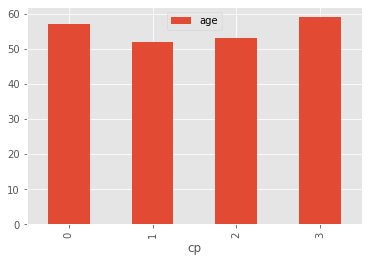

In [6]:
chest_pain.plot.bar(x="cp", y="age");

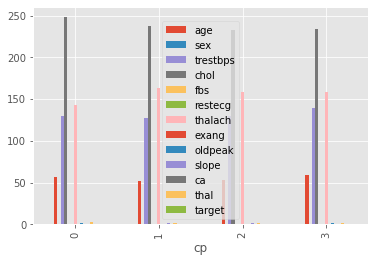

In [7]:
chest_pain.plot.bar(x="cp");

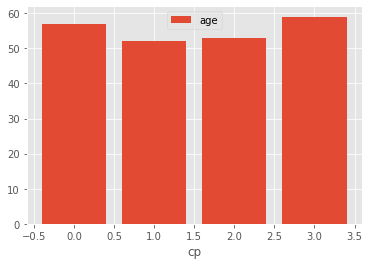

In [14]:
fig, ax = plt.subplots()
ax.bar(chest_pain["cp"], chest_pain["age"], label="age")
ax.set_xlabel("cp")
ax.legend();

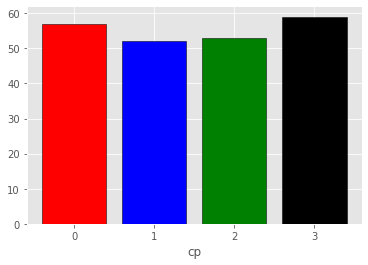

In [15]:
fig, ax = plt.subplots()
ax.bar(chest_pain["cp"], chest_pain["age"], label="age", 
       edgecolor="k", color=["red", "blue", "green", "black"])
ax.set_xlabel("cp")
ax.set_xticks(chest_pain["cp"]);

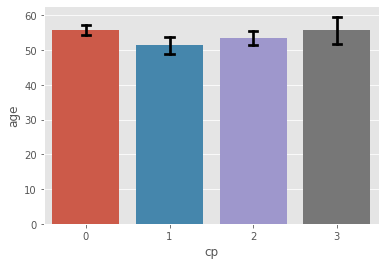

In [34]:
ax = sb.barplot(x="cp", y="age", errcolor="k", capsize=0.1, data=df)

## Scatter Plots


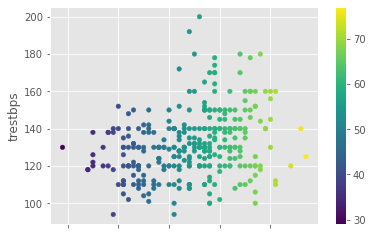

In [54]:
df.plot.scatter(x="age", y="trestbps", c=df["age"], colormap='viridis');

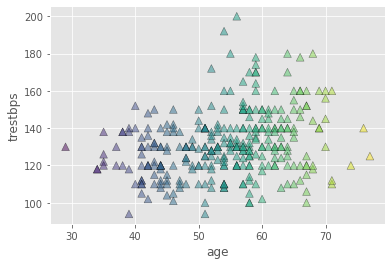

In [18]:
fig, ax = plt.subplots()
ax.scatter(df["age"], df["trestbps"], marker="^", 
           s=60, c=df["age"], edgecolors="k", alpha=0.5)
ax.set_xlabel("age")
ax.set_ylabel("trestbps");

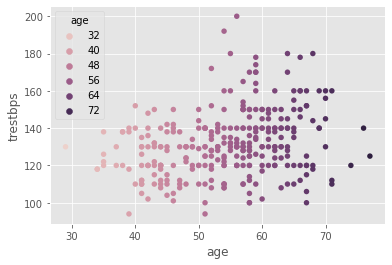

In [43]:
sb.scatterplot(x="age", y="trestbps", hue="age", s=30, edgecolor="none", data=df);

## Line Plots


In [44]:
ages = df.groupby("age").median().reset_index()
ages.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.00,2.0,0.0,2.0,1.0
1,34,0.5,2.0,118.0,196.0,0.0,0.5,183.0,0.0,0.35,2.0,0.0,2.0,1.0
2,35,1.0,0.0,124.0,195.0,0.0,1.0,165.0,0.5,0.70,2.0,0.0,2.5,0.5
3,37,0.5,2.0,125.0,232.5,0.0,1.0,178.5,0.0,1.75,1.0,0.0,2.0,1.0
4,38,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.00,2.0,4.0,2.0,1.0


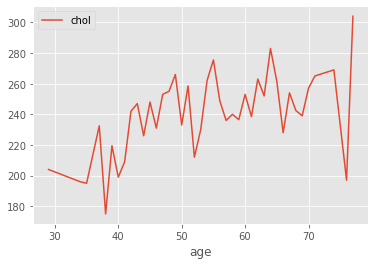

In [48]:
ages.plot.line(x="age", y="chol");

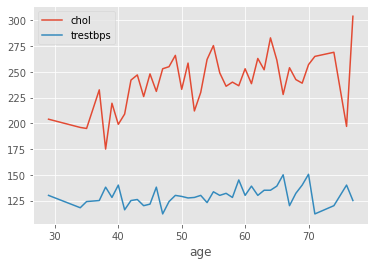

In [47]:
ages.plot.line(x="age", y=["chol", "trestbps"]);

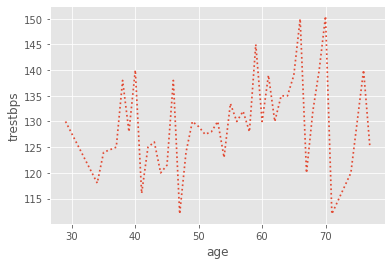

In [49]:
fig, ax = plt.subplots()
ax.plot(ages["age"], ages["trestbps"], ls=":", lw=1.7)
ax.set_xlabel("age")
ax.set_ylabel("trestbps");

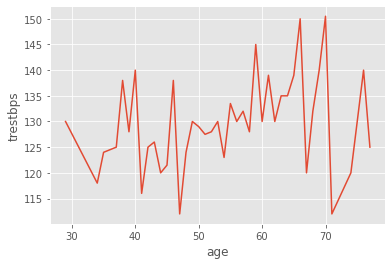

In [50]:
sb.lineplot(x="age", y="trestbps", data=ages);

### Recap

* bar
* scatter
* line

Doesn't get more fundamental than that.

Hopefully you're now familiar with the basic syntax, so we can move onto more specialised visualisations. 

Now, every plot shown here is a good way to visualise data. There is one unfortunately common way of visualising data which should ideally never be used. Have a guess what it is, and I'll rant about it in the next lecture.